In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pylab 
import sys
import warnings
import statistics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
# Comandos para suprimir os warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
# leando o arquivo

df1 = pd.read_csv('cars_train.csv', encoding='UTF-16', sep='\t')

In [4]:
df1.head(3)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472


In [5]:
# Explorando o arquivo parte 1
type(df1)

pandas.core.frame.DataFrame

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [7]:
# Altarando o tipo de dados
df1['ano_modelo'] = df1['ano_modelo'].astype(np.int16)
df1['ano_de_fabricacao'] = df1['ano_de_fabricacao'].astype(np.int16)
df1['num_portas'] = df1['num_portas'].astype(np.int16)
df1['ano_modelo'] = df1['ano_modelo'].astype(np.int16)
df1['preco'] = df1['preco'].astype(np.int32)
df1['entrega_delivery'] = df1['entrega_delivery'].astype(np.int32)
df1['troca'] = df1['troca'].astype(np.int32)
df1['elegivel_revisao'] = df1['elegivel_revisao'].astype(np.int32)

In [8]:
# Explorando o arquivo parte 2: Possui valores nulos?  muitos valores nulos

# Das 29.584 linhas temos: 6 colunas que serão excluida por falta de dados:
# veiculo_único_dono + revisoes_concessionaria + ipva_pago + veiculo_licenciado
# garantia_de_fábrica + revisoes_dentro_agenda + veiculo_alienado + troca 
# excluiremos as linhas da coluna fotos que estão com valores nulos

df1.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

In [9]:
df2 = df1.drop( columns=['id','veiculo_único_dono','revisoes_concessionaria','ipva_pago','veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','veiculo_alienado','dono_aceita_troca'])
df2 = df2.dropna(how='any', axis=0)

In [10]:
# Explorando o arquivo parte 3: Possui valores na? 
df2.isnull().sum()

num_fotos            0
marca                0
modelo               0
versao               0
ano_de_fabricacao    0
ano_modelo           0
hodometro            0
cambio               0
num_portas           0
tipo                 0
blindado             0
cor                  0
tipo_vendedor        0
cidade_vendedor      0
estado_vendedor      0
anunciante           0
entrega_delivery     0
troca                0
elegivel_revisao     0
preco                0
dtype: int64

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29407 entries, 0 to 29583
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_fotos          29407 non-null  float64
 1   marca              29407 non-null  object 
 2   modelo             29407 non-null  object 
 3   versao             29407 non-null  object 
 4   ano_de_fabricacao  29407 non-null  int16  
 5   ano_modelo         29407 non-null  int16  
 6   hodometro          29407 non-null  float64
 7   cambio             29407 non-null  object 
 8   num_portas         29407 non-null  int16  
 9   tipo               29407 non-null  object 
 10  blindado           29407 non-null  object 
 11  cor                29407 non-null  object 
 12  tipo_vendedor      29407 non-null  object 
 13  cidade_vendedor    29407 non-null  object 
 14  estado_vendedor    29407 non-null  object 
 15  anunciante         29407 non-null  object 
 16  entrega_delivery   294

In [12]:
df2.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,entrega_delivery,troca,elegivel_revisao,preco
count,29407.000000,29407.000000,29407.000000,29407.000000,29407.000000,29407.000000,29407.000000,29407.0,2.940700e+04
mean,10.323834,2016.736117,2017.788928,58578.248274,3.940320,0.203455,0.172102,0.0,1.331166e+05
std,3.487334,4.063757,2.668347,32581.281018,0.339346,0.402575,0.377475,0.0,8.185456e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,0.000000,0.000000,0.0,9.869000e+03
25%,8.000000,2015.000000,2016.000000,31316.500000,4.000000,0.000000,0.000000,0.0,7.651750e+04
50%,8.000000,2018.000000,2018.000000,57707.000000,4.000000,0.000000,0.000000,0.0,1.143190e+05
75%,14.000000,2019.000000,2020.000000,82095.500000,4.000000,0.000000,0.000000,0.0,1.639445e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,1.000000,1.000000,0.0,1.359812e+06


In [13]:
df2.agg({"preco": ["min", "mean", "max", "std", "count"]}).astype(np.int32)

,preco
min,9869
mean,133116
max,1359812
std,81854
count,29407


<Axes: >

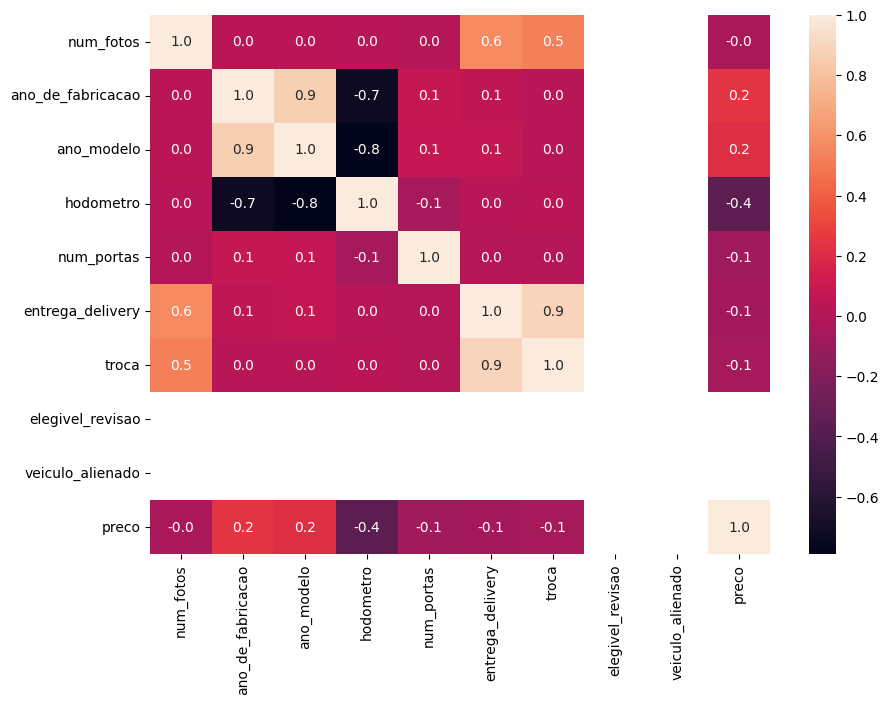

In [14]:
# Análise de correlação - Mapa de calor
#  Dada a alta correção e provavel efeito de colinearidade precisamos eliminar ou coluna Ano de Fabricação ou Ano do modelo.
#  optamos pela coluna Ano de Fabricação.

matriz_correlacao = df1.corr( )
plt.figure(figsize = (10, 7))
sns.heatmap(matriz_correlacao, annot = True, fmt='.1f')

In [15]:
df3 = df2.drop( columns=['ano_de_fabricacao'])

In [16]:
df3.head(3)

,num_fotos,marca,modelo,versao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,preco
0,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,0,0,0,74732
1,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,0,0,0,81965
2,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2019,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,1,0,0,162824


Text(0.5, 1.0, 'Top 10 - Marcas mais vendidas')

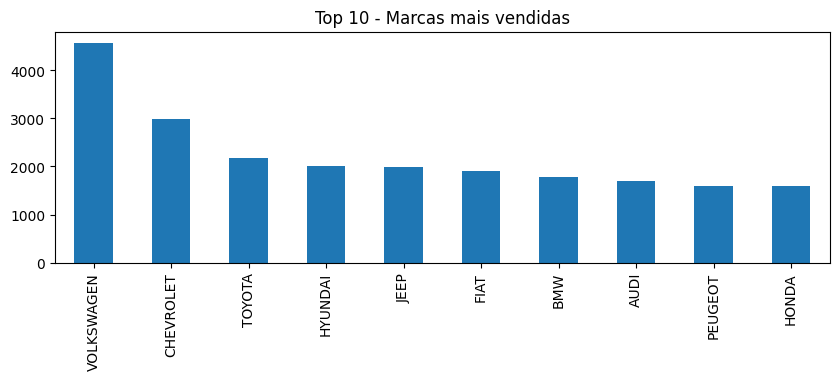

In [17]:
# Quais São as marcas mais vendidas? - A partir dessa perguntas descobrimos que a revenda 
# de automóveis deve prioriziar negociações com as 5 primeiras marcas, pois provavelmente os
# os veículos possuem menor tempo de permanência em estoque.

df3_Marcas_mais_vendidas = df3['marca'].value_counts()[:10]
#print(df3_Marcas_mais_vendidas)
df3_Marcas_mais_vendidas.plot(kind='bar', figsize=(10, 3))
plt.title('Top 10 - Marcas mais vendidas')

Text(0.5, 1.0, 'Top 10 - Modelos mais vendidos')

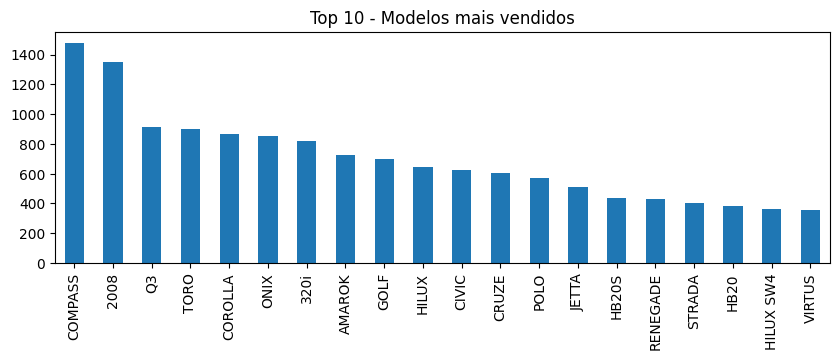

In [18]:
# Quais São os 10 modelos de carros mais vendidos? - A partir dessa perguntas descobrimos que a revenda 
# de automóveis deve prioriziar negociações com as 15 primeiras marcas, pois provavelmente os
# os veículos possuem menor tempo de permanência em estoque. Perceba que os veículos Volksawagem não 
# ocupam as primeiras posições no top 5 modelos mais vendidos, contido ao longo dos top 20 modelos
# mais vendidos temos mais modelos volkswagem dentras as demais marcas.


df3_Modelos_mais_vendidos = df3['modelo'].value_counts()[:20]
#print(df3_Modelos_mais_vendidos)
df3_Modelos_mais_vendidos.plot(kind='bar', figsize=(10, 3))
plt.title('Top 10 - Modelos mais vendidos')

Text(0.5, 1.0, 'Veículos mais vendidos por tipo de Câmbio')

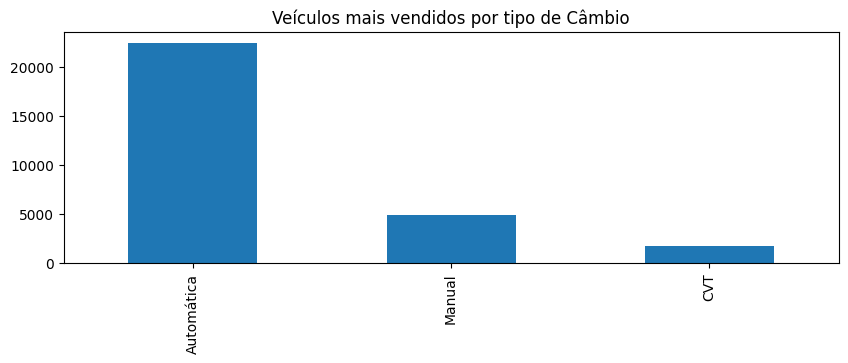

In [19]:
#Por esse gráfico é possível inferir que os veículos com câmbio automáticos tem preferência no momento
# da negociação. Logo deve-se dar preferência para os veículos automáticos no momento de compra.
df3_veiculos_Cambio = df3['cambio'].value_counts()[:3]
#print(df3_veiculos_Cambio)
df3_veiculos_Cambio.plot(kind='bar', figsize=(10, 3))
plt.title('Veículos mais vendidos por tipo de Câmbio')

Text(0.5, 1.0, 'TOP 25 Cidades com mais veículos vendidos')

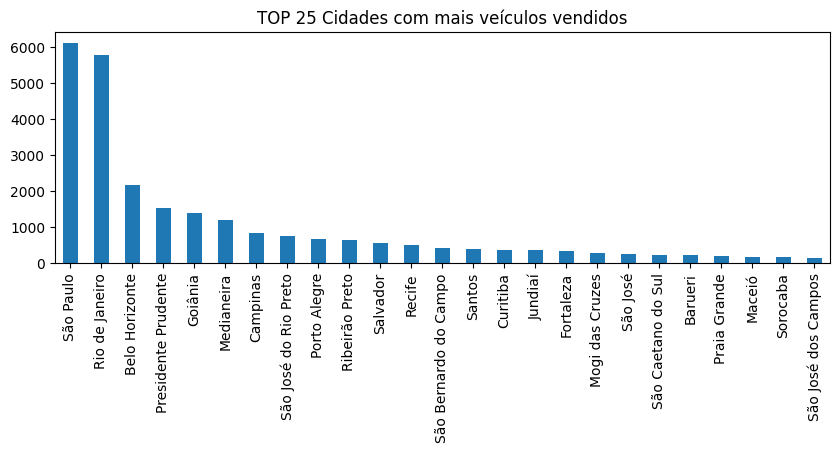

In [20]:
# 25 melhores cidades para vender veículos. 

def3_cidade_mais_vendas = df3['cidade_vendedor'].value_counts()[:25]
#print(def3_cidade_mais_vendas)
def3_cidade_mais_vendas.plot(kind='bar', figsize=(10, 3))
plt.title('TOP 25 Cidades com mais veículos vendidos')

Text(0.5, 1.0, 'Venda de Veículos por Estado - Acima de 100 veículos')

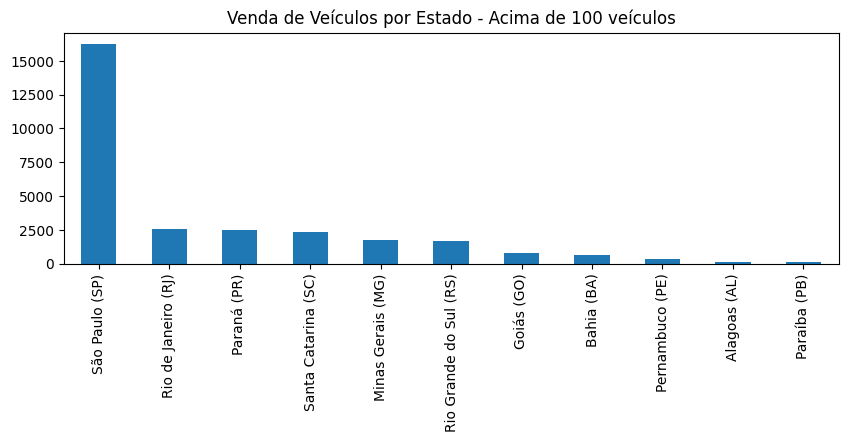

In [21]:
# Estados com quantidade de vendas superior a 100 veículos.

def3_estado_melhor_venda = df3['estado_vendedor'].value_counts()[:11]
#print(def3_estado_melhor_venda)
def3_estado_melhor_venda.plot(kind='bar', figsize=(10, 3))
plt.title('Venda de Veículos por Estado - Acima de 100 veículos')

Text(0.5, 1.0, 'Venda de Carros Populares (preço < 70.000 reais)')

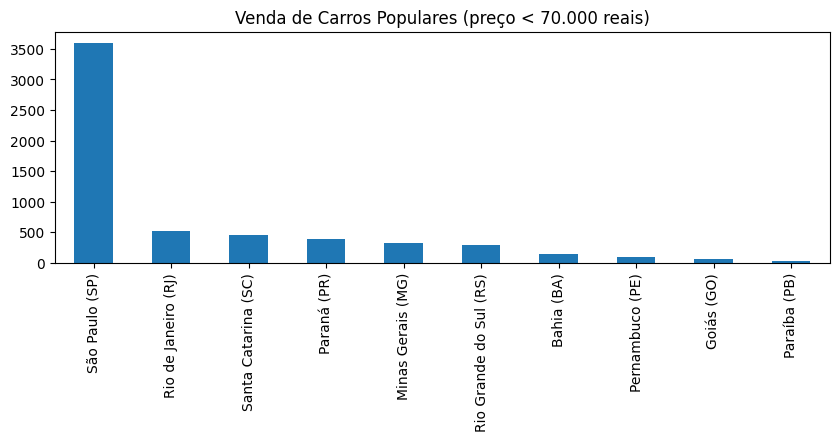

In [22]:
# Venda de Carros populares

#Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
# O melhor estado para vender carros populares ainda é São Paulo por ser um Estado muito populoso. 
# A partir do terceiro Estado é possível perceber que a venda de carros populares não guarda mais
# relação direta com o tamanho da população.

df3_carros_populares = df3[df3['preco']<70000]['estado_vendedor'].value_counts()[:10]
#print(df3_carros_populares)
df3_carros_populares.plot(kind='bar', figsize=(10, 3))
plt.title('Venda de Carros Populares (preço < 70.000 reais)')

In [23]:
#Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
# O melhor Estado para comprar uma picape com transmissão automática é São Paulo com 1712 Picapes.
# O segundo melhor Estado é o Paraná com 348 Picapes.

df3_Picape_automatica = df3.groupby((df3['tipo']=='Picape') & (df3['cambio'] =='Automática' ))['estado_vendedor'].value_counts()
print(df3_Picape_automatica)


       estado_vendedor         
False  São Paulo (SP)              14563
       Rio de Janeiro (RJ)          2222
       Paraná (PR)                  2162
       Santa Catarina (SC)          2019
       Minas Gerais (MG)            1551
       Rio Grande do Sul (RS)       1448
       Goiás (GO)                    676
       Bahia (BA)                    535
       Pernambuco (PE)               304
       Alagoas (AL)                  110
       Paraíba (PB)                  104
       Rio Grande do Norte (RN)       89
       Ceará (CE)                     69
       Pará (PA)                      55
       Amazonas (AM)                  51
       Mato Grosso do Sul (MS)        30
       Mato Grosso (MT)               25
       Acre (AC)                      23
       Espírito Santo (ES)            21
       Sergipe (SE)                   19
       Tocantins (TO)                 17
       Maranhão (MA)                   7
       Rondônia (RO)                   4
       Roraima (RR)      

In [24]:
# Tratando outliers

In [25]:
df4 = df3

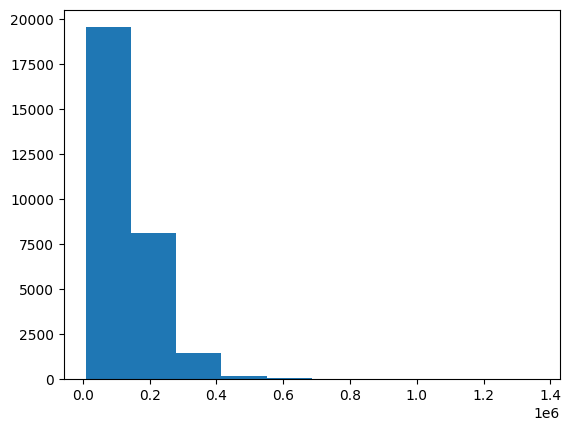

In [26]:
plt.hist(df4['preco'])
plt.show()

In [27]:
#quantidade de linhas: 29407
df4['preco'].shape

(29407,)

In [28]:
#outliers Superiores
df4_out = df4[df4['preco']>500000].value_counts()
df4_out.shape

(89,)

In [29]:
#outliers Superiores
df4_out = df4[df4['preco']<20000].value_counts()
df4_out.shape

(28,)

In [30]:
# Removendo outliers
df4 = df4.loc[(df4['preco'] > 20000) & (df4['preco'] < 500000)]

In [31]:
df4.shape

(29290, 19)

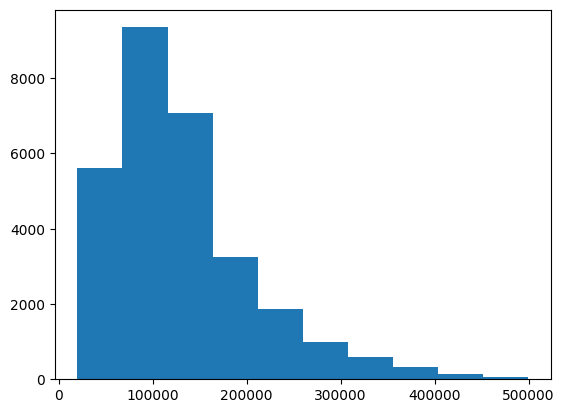

In [32]:
plt.hist(df4['preco'])
plt.show()

In [33]:
df5 = df4.drop(columns=["num_fotos","cidade_vendedor","estado_vendedor"])

In [34]:
Y = df5['preco']
X = df5.drop('preco', axis=1)

In [35]:
# Agora vamos transformar as variáveis categoricas em numéricas
# Passo 1: sinalizando quais colunas são categoricas e precisam ser alteradas de letras para números

categorical_features = ['marca','modelo', 'versao', 'cambio', 'tipo', 'blindado', 'cor',
                        'tipo_vendedor', 'num_portas','anunciante', 'entrega_delivery',
                        'troca','elegivel_revisao']


In [36]:
# Passo 2: criando a função para transformar categoricas em numéricas

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough' )

# transformed_x = transformer.fit_transform(df5)
transformed_XX = transformer.fit_transform(X)
transformed_XX

<29290x2438 sparse matrix of type '<class 'numpy.float64'>'
	with 439350 stored elements in Compressed Sparse Row format>

In [37]:
df6 = pd.DataFrame.sparse.from_spmatrix(transformed_XX) 

In [38]:
df6.head(2)

,0,1,2,3,4,5,6,7,8,9,...,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2017.0,67772.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2017.0,62979.0


In [39]:
#Dividindo em treino e teste

X_train, X_test, Y_train, Y_test = train_test_split(df6, Y, test_size= 0.2)

In [40]:
# Construindo o modelo de maching Learning = Random Forest

model1 = RandomForestRegressor()  #criando o modelo
model1.fit(X_train, Y_train)      # treinando o modelo
model1.score(X_test, Y_test )     # avaliando o modelo

0.7149364038387229

In [41]:
# Procurando melhores parâmetros com Grid SearchCV

In [42]:
#espaco_de_parametros = {
#    'bootstrap' : [False, True],
#    'max_features' : [1, 3, 5],
#    'n_estimators' : [10, 50, 100],
#    'criterion' : ['log2', 'friedman_mse'].
#    'max_depth' : [1, 3, 5]
#}


In [45]:
#busca = GridSearchCV(RandomForestRegressor(), espaco_de_parametros,
#                     cv = KFold(n_splits = 5, shuffle = True))

In [46]:
#busca.fit(df6, Y)

In [47]:
#busca.best_params_

In [48]:
#resultados = pd.DataFrame(busca.cv_results_)

In [49]:
#resultados.head(2)

In [44]:
# testando parametros = Random Forest
#{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 10}
#{'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 20}

model2 = RandomForestRegressor( bootstrap= True,
                               n_estimators= 100,
                               max_features= 5,
                               criterion = "friedman_mse",
                               max_depth = 5
                               )  #criando o modelo
model2.fit(X_train, Y_train)      # treinando o modelo
model2.score(X_test, Y_test )     # avaliando o modelo

0.043325348415852005